#  "Explorando el corazón: Utilizando datos clínicos y de estilo de vida para predecir enfermedades cardíacas"

#### PREPROCESAMIENTO DE LOS DATOS

En este notebook, nos enfrentamos a un problema de **clasificación binaria** relacionado con la predicción de enfermedades cardíacas. Nuestro objetivo es utilizar datos clínicos y de estilo de vida para predecir si un individuo tiene o no una enfermedad cardíaca.

El primer paso en nuestro proceso es el preprocesamiento de los datos. Realizaremos varias tareas de limpieza y transformación para preparar los datos para el modelo de clasificación. Estas tareas incluyen:

<details>
<summary>Tareas de limpieza y transformación de datos</summary>
<p>

1. Conversión de datos de tipo string a tipo numérico: Algunas columnas en nuestro conjunto de datos pueden contener valores en formato de cadena (string), como "Sí" o "No". Convertiremos estos valores en representaciones numéricas para facilitar el procesamiento.

2. Uso de Label Encoder: Si hay características categóricas ordinales en nuestro conjunto de datos, utilizaremos el codificador de etiquetas (Label Encoder) para asignar un código numérico a cada categoría. Esto nos permitirá trabajar con estas características en nuestros modelos de clasificación.

3. Codificación binaria de columnas: En nuestro conjunto de datos, es posible que tengamos columnas que contengan valores como "Sí" o "No". Para simplificar el análisis, reemplazaremos estos valores con códigos binarios, como 1 para "Sí" y 0 para "No".

Además de estas tareas, también utilizaremos bucles para automatizar y evitar la repetición de operaciones en nuestros datos. Esto nos permitirá aplicar transformaciones de manera eficiente y consistente en todo el conjunto de datos.

Una vez que hayamos realizado el preprocesamiento de los datos, estaremos listos para continuar con la construcción y entrenamiento de nuestro modelo de clasificación para predecir enfermedades cardíacas.

</p>
</details>


In [2]:
# Importamos las distintas librerias necesarias para el análisis

# Tratamiento de datos
import numpy as np
import pandas as pd

# Tratamiento de las variables categóricas que se pueden ordenar
from sklearn.preprocessing import LabelEncoder

# Configuración warnings
import warnings
warnings.filterwarnings('ignore')

In [3]:
df= pd.read_csv("../data/raw/heart_2020_cleaned.csv")
df

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3.0,30.0,No,Female,55-59,White,Yes,Yes,Very good,5.0,Yes,No,Yes
1,No,20.34,No,No,Yes,0.0,0.0,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No
2,No,26.58,Yes,No,No,20.0,30.0,No,Male,65-69,White,Yes,Yes,Fair,8.0,Yes,No,No
3,No,24.21,No,No,No,0.0,0.0,No,Female,75-79,White,No,No,Good,6.0,No,No,Yes
4,No,23.71,No,No,No,28.0,0.0,Yes,Female,40-44,White,No,Yes,Very good,8.0,No,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
319790,Yes,27.41,Yes,No,No,7.0,0.0,Yes,Male,60-64,Hispanic,Yes,No,Fair,6.0,Yes,No,No
319791,No,29.84,Yes,No,No,0.0,0.0,No,Male,35-39,Hispanic,No,Yes,Very good,5.0,Yes,No,No
319792,No,24.24,No,No,No,0.0,0.0,No,Female,45-49,Hispanic,No,Yes,Good,6.0,No,No,No
319793,No,32.81,No,No,No,0.0,0.0,No,Female,25-29,Hispanic,No,No,Good,12.0,No,No,No


In [31]:
# Observamos que la cantidad de datos es bastante grande con 319755 filas y 18 columnas
# No nos encontramos con valores nulos
# Tenemos valores de tipo objeto y float
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319795 entries, 0 to 319794
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   HeartDisease      319795 non-null  object 
 1   BMI               319795 non-null  float64
 2   Smoking           319795 non-null  object 
 3   AlcoholDrinking   319795 non-null  object 
 4   Stroke            319795 non-null  object 
 5   PhysicalHealth    319795 non-null  float64
 6   MentalHealth      319795 non-null  float64
 7   DiffWalking       319795 non-null  object 
 8   Sex               319795 non-null  object 
 9   AgeCategory       319795 non-null  object 
 10  Race              319795 non-null  object 
 11  Diabetic          319795 non-null  object 
 12  PhysicalActivity  319795 non-null  object 
 13  GenHealth         319795 non-null  object 
 14  SleepTime         319795 non-null  float64
 15  Asthma            319795 non-null  object 
 16  KidneyDisease     31

In [32]:
# Nos asecuramos de que no hay valores nulos en ninguna columna
df.isnull().sum()

HeartDisease        0
BMI                 0
Smoking             0
AlcoholDrinking     0
Stroke              0
PhysicalHealth      0
MentalHealth        0
DiffWalking         0
Sex                 0
AgeCategory         0
Race                0
Diabetic            0
PhysicalActivity    0
GenHealth           0
SleepTime           0
Asthma              0
KidneyDisease       0
SkinCancer          0
dtype: int64

In [33]:
# Incluimos todos los parámetros para hacernos una idea más general
df.describe(include="all")

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
count,319795,319795.000000,319795,319795,319795,319795.00000,319795.000000,319795,319795,319795,319795,319795,319795,319795,319795.000000,319795,319795,319795
unique,2,NaN,2,2,2,NaN,NaN,2,2,13,6,4,2,5,NaN,2,2,2
top,No,NaN,No,No,No,NaN,NaN,No,Female,65-69,White,No,Yes,Very good,NaN,No,No,No
freq,292422,NaN,187887,298018,307726,NaN,NaN,275385,167805,34151,245212,269653,247957,113858,NaN,276923,308016,289976
mean,NaN,28.325399,NaN,NaN,NaN,3.37171,3.898366,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.097075,NaN,NaN,NaN
std,NaN,6.356100,NaN,NaN,NaN,7.95085,7.955235,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.436007,NaN,NaN,NaN
min,NaN,12.020000,NaN,NaN,NaN,0.00000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,NaN,NaN,NaN
25%,NaN,24.030000,NaN,NaN,NaN,0.00000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.000000,NaN,NaN,NaN
50%,NaN,27.340000,NaN,NaN,NaN,0.00000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.000000,NaN,NaN,NaN
75%,NaN,31.420000,NaN,NaN,NaN,2.00000,3.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.000000,NaN,NaN,NaN


In [9]:
# Verificamos la distribución de los valores en cada columna
for column in df.columns:
    print(df[column].value_counts())
    print()

HeartDisease
No     292422
Yes     27373
Name: count, dtype: int64

BMI
26.63    3762
27.46    2767
27.44    2723
24.41    2696
27.12    2525
         ... 
59.85       1
50.59       1
92.53       1
62.95       1
46.56       1
Name: count, Length: 3604, dtype: int64

Smoking
No     187887
Yes    131908
Name: count, dtype: int64

AlcoholDrinking
No     298018
Yes     21777
Name: count, dtype: int64

Stroke
No     307726
Yes     12069
Name: count, dtype: int64

PhysicalHealth
0.0     226589
30.0     19509
2.0      14880
1.0      10489
3.0       8617
5.0       7606
10.0      5453
15.0      5012
7.0       4629
4.0       4468
20.0      3216
14.0      2893
6.0       1270
25.0      1164
8.0        924
21.0       626
12.0       605
28.0       446
29.0       204
9.0        180
18.0       167
16.0       135
27.0       124
17.0       110
13.0        91
22.0        89
11.0        85
24.0        67
26.0        66
23.0        46
19.0        35
Name: count, dtype: int64

MentalHealth
0.0     205401
30

In [35]:
df.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3.0,30.0,No,Female,55-59,White,Yes,Yes,Very good,5.0,Yes,No,Yes
1,No,20.34,No,No,Yes,0.0,0.0,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No
2,No,26.58,Yes,No,No,20.0,30.0,No,Male,65-69,White,Yes,Yes,Fair,8.0,Yes,No,No
3,No,24.21,No,No,No,0.0,0.0,No,Female,75-79,White,No,No,Good,6.0,No,No,Yes
4,No,23.71,No,No,No,28.0,0.0,Yes,Female,40-44,White,No,Yes,Very good,8.0,No,No,No


#### TRATAMIENTO DE LAS VARIABLES BINARIAS

In [36]:
# Realizamos un bucle para ver los valores únicos de cada variable
columns = ["HeartDisease", "BMI", "Smoking", "AlcoholDrinking", "Stroke", "PhysicalHealth", "MentalHealth",
           "DiffWalking", "Sex", "AgeCategory", "Race", "Diabetic", "PhysicalActivity", "GenHealth", "SleepTime",
           "Asthma", "KidneyDisease", "SkinCancer"]

for column in columns:
    unique_values = df[column].unique()
    print(column, unique_values)

HeartDisease ['No' 'Yes']
BMI [16.6  20.34 26.58 ... 62.42 51.46 46.56]
Smoking ['Yes' 'No']
AlcoholDrinking ['No' 'Yes']
Stroke ['No' 'Yes']
PhysicalHealth [ 3.  0. 20. 28.  6. 15.  5. 30.  7.  1.  2. 21.  4. 10. 14. 18.  8. 25.
 16. 29. 27. 17. 24. 12. 23. 26. 22. 19.  9. 13. 11.]
MentalHealth [30.  0.  2.  5. 15.  8.  4.  3. 10. 14. 20.  1.  7. 24.  9. 28. 16. 12.
  6. 25. 17. 18. 21. 29. 22. 13. 23. 27. 26. 11. 19.]
DiffWalking ['No' 'Yes']
Sex ['Female' 'Male']
AgeCategory ['55-59' '80 or older' '65-69' '75-79' '40-44' '70-74' '60-64' '50-54'
 '45-49' '18-24' '35-39' '30-34' '25-29']
Race ['White' 'Black' 'Asian' 'American Indian/Alaskan Native' 'Other'
 'Hispanic']
Diabetic ['Yes' 'No' 'No, borderline diabetes' 'Yes (during pregnancy)']
PhysicalActivity ['Yes' 'No']
GenHealth ['Very good' 'Fair' 'Good' 'Poor' 'Excellent']
SleepTime [ 5.  7.  8.  6. 12.  4.  9. 10. 15.  3.  2.  1. 16. 18. 14. 20. 11. 13.
 17. 24. 19. 21. 22. 23.]
Asthma ['Yes' 'No']
KidneyDisease ['No' 'Yes']
Skin

In [37]:
# Realización de bucle para cambiar los "No" por 0 y los "Yes" por 1 de sus respectivas columnas
binary_columns = ["HeartDisease", "Smoking", "AlcoholDrinking", "Stroke", "DiffWalking",
                  "PhysicalActivity", "Asthma", "KidneyDisease", "SkinCancer"]

for column in binary_columns:
    df[column] = df[column].map({"No": 0, "Yes": 1})


In [38]:
df.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,0,16.60,1,0,0,3.0,30.0,0,Female,55-59,White,Yes,1,Very good,5.0,1,0,1
1,0,20.34,0,0,1,0.0,0.0,0,Female,80 or older,White,No,1,Very good,7.0,0,0,0
2,0,26.58,1,0,0,20.0,30.0,0,Male,65-69,White,Yes,1,Fair,8.0,1,0,0
3,0,24.21,0,0,0,0.0,0.0,0,Female,75-79,White,No,0,Good,6.0,0,0,1
4,0,23.71,0,0,0,28.0,0.0,1,Female,40-44,White,No,1,Very good,8.0,0,0,0


In [39]:
# De la columna de "Sex"
df["Sex"][df["Sex"] == "Female"] = 0
df["Sex"][df["Sex"] == "Male"] = 1

# Cambio de tipo objet a tipo int
df["Sex"] = df["Sex"].astype(int)


In [40]:
# Realización de un bucle para convertir las columnas que he cambiado a binarias pues transformarlas de su formato object a int.
columns_to_convert = ["HeartDisease", "Smoking", "AlcoholDrinking", "Stroke", "DiffWalking",
                      "PhysicalActivity", "Asthma", "KidneyDisease", "SkinCancer"]

for column in columns_to_convert:
    df[column] = df[column].astype(int)


In [41]:
df.dtypes

HeartDisease          int32
BMI                 float64
Smoking               int32
AlcoholDrinking       int32
Stroke                int32
PhysicalHealth      float64
MentalHealth        float64
DiffWalking           int32
Sex                   int32
AgeCategory          object
Race                 object
Diabetic             object
PhysicalActivity      int32
GenHealth            object
SleepTime           float64
Asthma                int32
KidneyDisease         int32
SkinCancer            int32
dtype: object

In [42]:
# Realización de un bucle para observar como se encuentran los datos binarios
columns_to_count = ["HeartDisease", "Smoking", "AlcoholDrinking", "Stroke", "DiffWalking",
                    "Sex", "PhysicalActivity", "Asthma", "KidneyDisease", "SkinCancer"]

for column in columns_to_count:
    value_counts = df[column].value_counts()
    print(column, value_counts)


HeartDisease HeartDisease
0    292422
1     27373
Name: count, dtype: int64
Smoking Smoking
0    187887
1    131908
Name: count, dtype: int64
AlcoholDrinking AlcoholDrinking
0    298018
1     21777
Name: count, dtype: int64
Stroke Stroke
0    307726
1     12069
Name: count, dtype: int64
DiffWalking DiffWalking
0    275385
1     44410
Name: count, dtype: int64
Sex Sex
0    167805
1    151990
Name: count, dtype: int64
PhysicalActivity PhysicalActivity
1    247957
0     71838
Name: count, dtype: int64
Asthma Asthma
0    276923
1     42872
Name: count, dtype: int64
KidneyDisease KidneyDisease
0    308016
1     11779
Name: count, dtype: int64
SkinCancer SkinCancer
0    289976
1     29819
Name: count, dtype: int64


#### TRATAMIENTO DE LAS VARIABLES CATEGÓRICAS

In [43]:
# Columnas a las que se les aplicará el LabelEncoder
columns = ['AgeCategory', 'Race', 'Diabetic', 'GenHealth']

# Creamos una instancia de LabelEncoder
label_encoder = LabelEncoder()

# Realización de un bucle y aplicación del LabelEncoder
for col in columns:
    df[col + '_encoded'] = label_encoder.fit_transform(df[col])



In [44]:
df.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,...,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer,AgeCategory_encoded,Race_encoded,Diabetic_encoded,GenHealth_encoded
0,0,16.60,1,0,0,3.0,30.0,0,0,55-59,...,1,Very good,5.0,1,0,1,7,5,2,4
1,0,20.34,0,0,1,0.0,0.0,0,0,80 or older,...,1,Very good,7.0,0,0,0,12,5,0,4
2,0,26.58,1,0,0,20.0,30.0,0,1,65-69,...,1,Fair,8.0,1,0,0,9,5,2,1
3,0,24.21,0,0,0,0.0,0.0,0,0,75-79,...,0,Good,6.0,0,0,1,11,5,0,2
4,0,23.71,0,0,0,28.0,0.0,1,0,40-44,...,1,Very good,8.0,0,0,0,4,5,0,4


In [45]:
df.dtypes

HeartDisease             int32
BMI                    float64
Smoking                  int32
AlcoholDrinking          int32
Stroke                   int32
PhysicalHealth         float64
MentalHealth           float64
DiffWalking              int32
Sex                      int32
AgeCategory             object
Race                    object
Diabetic                object
PhysicalActivity         int32
GenHealth               object
SleepTime              float64
Asthma                   int32
KidneyDisease            int32
SkinCancer               int32
AgeCategory_encoded      int32
Race_encoded             int32
Diabetic_encoded         int32
GenHealth_encoded        int32
dtype: object

#### TRATAMIENTO DE LAS VARIABLES TIPO FLOAT

A continuación voy a tratar las variables de tipo float para poder obtener mejores métricas y que los datos se encuentren más ajustados los unos de los otros. Para ello trataremos las siguientes variables: "BMI", "PhysicalHealt", "MentalHealth" Y "SleepTime".

<details>
<summary>Resumen de cómo se van a crear las variables</summary>
<p>
1. Con la variable de "BMI":
    
    a. Trataremos de realizar un agrupamiento de los valores basandonos en que el Índice de Masa corporal ("BMI") se puede agrupar en diversos grupos como los siguientes: 
    
        Bajo peso: IMC menor a 18.5

        Peso normal: IMC entre 18.5 y 24.9

        Sobrepeso: IMC entre 25 y 29.9

        Obesidad clase I: IMC entre 30 y 34.9

        Obesidad clase II: IMC entre 35 y 39.9

        Obesidad clase III (obesidad mórbida): IMC igual o mayor a 40
        
    b. Luego trataremos de aplicar un mapeo de estos grupos dando un valor a cada uno.

2. Con la variable de "PhysicalHealt":

    Trataremos de realizar un agrupamiento de los valores basandonos en:

        Buena salud = 1

        Moderada salud = 2

        Mala salud = 3

3. Con la variable de "MentalHealth":

    Trataremos de realizar un agrupamiento de los valores basandonos en:

        Buena salud = 1

        Moderada salud = 2

        Mala salud = 3

4. Con la variable de "SleepTime":

    Traterems de realizar un agrupamiento de los valores basandonos en:
    
        Insuficiente = 1

        Óptimo = 2

        Excesivo = 3
</p>


</p>
</details>

##### TRANSFORMACIÓN DE LA VARIABLE "BMI"

In [46]:
# La variable "BMI", la cual nos muestra el ídice de masa corporal
df["BMI"] = df["BMI"].round() # tenemos que redondear los valores para que no se creen valores nulos

In [47]:
# Definición de las categorías y los límites de los rangos de IMC
categories = {
    'Bajo peso': (0, 18.4),
    'Peso normal': (18.5, 24.9),
    'Sobrepeso': (25, 29.9),
    'Obesidad clase I': (30, 34.9),
    'Obesidad clase II': (35, 39.9),
    'Obesidad clase III (obesidad mórbida)': (40, float('inf'))
}


In [48]:
# Realización de una función para aplicar un bucle sobre la variable más fácilmente
def assign_category(bmi):
    for category, (lower, upper) in categories.items():
        if lower <= bmi <= upper:
            return category


In [49]:
# Aplicamos la funciñon a la variable y creamos una nueva columna
df['BMI_Category'] = df['BMI'].apply(assign_category)


In [50]:
# comprobamos que no quedab valores nulos
df['BMI_Category'].isnull().sum()

0

In [51]:
# Cambiamos los string que le hemos puesto por valores
category_mapping = {
    'Bajo peso': 1,
    'Peso normal': 2,
    'Sobrepeso': 3,
    'Obesidad clase I': 4,
    'Obesidad clase II': 5,
    'Obesidad clase III (obesidad mórbida)': 6
}
df['BMI_Category_Ordinal'] = df['BMI_Category'].map(category_mapping)


In [27]:
# Comprobamos si la transformación se ha hecho correctamente
df['BMI_Category_Ordinal']

0         1
1         2
2         3
3         2
4         2
         ..
319790    3
319791    4
319792    2
319793    4
319794    6
Name: BMI_Category_Ordinal, Length: 319795, dtype: int64

##### TRANSFORMACIÓN DE LA VARIABLE DE "PhysicalHealth"

In [52]:
# Vemos los valores únicos de 'PhysicalHealth' para hacernos una idea de como se realizarn los grupos
df['PhysicalHealth'].unique()

array([ 3.,  0., 20., 28.,  6., 15.,  5., 30.,  7.,  1.,  2., 21.,  4.,
       10., 14., 18.,  8., 25., 16., 29., 27., 17., 24., 12., 23., 26.,
       22., 19.,  9., 13., 11.])

In [53]:
# Definimos los grupos de salud
umbral_buena_salud = 5
umbral_moderada_salud = 15

# Creamos una nueva columna con los grupos de salud
df['GrupoSalud'] = np.select([df['PhysicalHealth'] < umbral_buena_salud, 
                              df['PhysicalHealth'] <= umbral_moderada_salud],
                             ['Buena salud', 'Salud moderada'], default='Mala salud')


In [54]:
# Comprobamos que se ha convertido correctamente
df['GrupoSalud'] 

0            Buena salud
1            Buena salud
2             Mala salud
3            Buena salud
4             Mala salud
               ...      
319790    Salud moderada
319791       Buena salud
319792       Buena salud
319793       Buena salud
319794       Buena salud
Name: GrupoSalud, Length: 319795, dtype: object

In [55]:
# Cambiamos los string que le hemos puesto por valores
category_mapping = {
    'Buena salud': 1,
    'Salud moderada': 2,
    'Mala salud': 3,
}
df['GrupoSalud_Ordinal'] = df['GrupoSalud'].map(category_mapping)

In [56]:
# Comprobamos que se ha convertido correctamente
df['GrupoSalud_Ordinal']

0         1
1         1
2         3
3         1
4         3
         ..
319790    2
319791    1
319792    1
319793    1
319794    1
Name: GrupoSalud_Ordinal, Length: 319795, dtype: int64

##### TRANSFORMACIÓN DE LA VARIABLE "MentalHealth"

In [57]:
# Vemos los valores únicos de 'MentalHealth' para hacernos una idea de como se realizarn los grupos
df['MentalHealth'].unique()

array([30.,  0.,  2.,  5., 15.,  8.,  4.,  3., 10., 14., 20.,  1.,  7.,
       24.,  9., 28., 16., 12.,  6., 25., 17., 18., 21., 29., 22., 13.,
       23., 27., 26., 11., 19.])

In [58]:
# Definimos los grupos de salud mental
umbral_buena_salud_mental = 5
umbral_moderada_salud_mental = 15

# Creamos una nueva columna con los grupos de salud
df['GrupoSalud_Mental'] = np.select([df['MentalHealth'] < umbral_buena_salud_mental, 
                              df['MentalHealth'] <= umbral_moderada_salud_mental],
                             ['Buena salud', 'Salud moderada'], default='Mala salud')


In [59]:
# Comprobamos que se ha convertido correctamente
df['GrupoSalud_Mental']

0          Mala salud
1         Buena salud
2          Mala salud
3         Buena salud
4         Buena salud
             ...     
319790    Buena salud
319791    Buena salud
319792    Buena salud
319793    Buena salud
319794    Buena salud
Name: GrupoSalud_Mental, Length: 319795, dtype: object

In [60]:
# Cambiamos los string que le hemos puesto por valores
category_mapping_mental = {
    'Buena salud': 1,
    'Salud moderada': 2,
    'Mala salud': 3,
}
df['GrupoSalud_Mental_Ordinal'] = df['GrupoSalud_Mental'].map(category_mapping_mental)


In [61]:
# Comprobamos que se ha convertido correctamente
df['GrupoSalud_Mental_Ordinal']

0         3
1         1
2         3
3         1
4         1
         ..
319790    1
319791    1
319792    1
319793    1
319794    1
Name: GrupoSalud_Mental_Ordinal, Length: 319795, dtype: int64

##### TRANSFORMACIÓN DE LA VARIABLE DE "SleepTime"

In [62]:
# Vemos los valores únicos de 'MentalHealth' para hacernos una idea de como se realizarn los grupos
df['SleepTime'].unique()

array([ 5.,  7.,  8.,  6., 12.,  4.,  9., 10., 15.,  3.,  2.,  1., 16.,
       18., 14., 20., 11., 13., 17., 24., 19., 21., 22., 23.])

In [63]:
# Definimos los grupos de "SleepTime"
insuficiente_limit = 6
optimo_lower_limit = 7
optimo_upper_limit = 9

# Crear una nueva columna 'SleepGroup' basada en los grupos específicos
bins = [0, insuficiente_limit, optimo_lower_limit, float('inf')]
labels = ['Insuficiente', 'Óptimo', 'Excesivo']
df['SleepGroup'] = pd.cut(df['SleepTime'], bins=bins, labels=labels, right=False)

# Imprimir la cuenta de valores en cada grupo
print(df['SleepGroup'].value_counts())

SleepGroup
Excesivo        222809
Óptimo           66721
Insuficiente     30265
Name: count, dtype: int64


In [64]:
# Cambiamos los string que le hemos puesto por valores
category_mapping_sleep = {
    'Insuficiente': 1,
    'Óptimo': 2,
    'Excesivo': 3,
}
df['SleepGroup_Ordinal'] = df['SleepGroup'].map(category_mapping_sleep)

In [65]:
df['SleepGroup_Ordinal'].astype(int)

0         1
1         3
2         3
3         2
4         3
         ..
319790    2
319791    1
319792    2
319793    3
319794    3
Name: SleepGroup_Ordinal, Length: 319795, dtype: int32

In [66]:
# Para comprobar que se ha hecho correctamente y no ha generado valores nulos
df['SleepGroup_Ordinal'].isnull().sum()

0

In [67]:
df.dtypes

HeartDisease                    int32
BMI                           float64
Smoking                         int32
AlcoholDrinking                 int32
Stroke                          int32
PhysicalHealth                float64
MentalHealth                  float64
DiffWalking                     int32
Sex                             int32
AgeCategory                    object
Race                           object
Diabetic                       object
PhysicalActivity                int32
GenHealth                      object
SleepTime                     float64
Asthma                          int32
KidneyDisease                   int32
SkinCancer                      int32
AgeCategory_encoded             int32
Race_encoded                    int32
Diabetic_encoded                int32
GenHealth_encoded               int32
BMI_Category                   object
BMI_Category_Ordinal            int64
GrupoSalud                     object
GrupoSalud_Ordinal              int64
GrupoSalud_M

In [319]:
df.columns

Index(['HeartDisease', 'BMI', 'Smoking', 'AlcoholDrinking', 'Stroke',
       'PhysicalHealth', 'MentalHealth', 'DiffWalking', 'Sex', 'AgeCategory',
       'Race', 'Diabetic', 'PhysicalActivity', 'GenHealth', 'SleepTime',
       'Asthma', 'KidneyDisease', 'SkinCancer', 'AgeCategory_encoded',
       'Race_encoded', 'Diabetic_encoded', 'GenHealth_encoded', 'BMI_Category',
       'BMI_Category_Ordinal', 'GrupoSalud', 'GrupoSalud_Ordinal',
       'GrupoSalud_Mental', 'GrupoSalud_Mental_Ordinal', 'SleepGroup',
       'SleepGroup_Ordinal'],
      dtype='object')

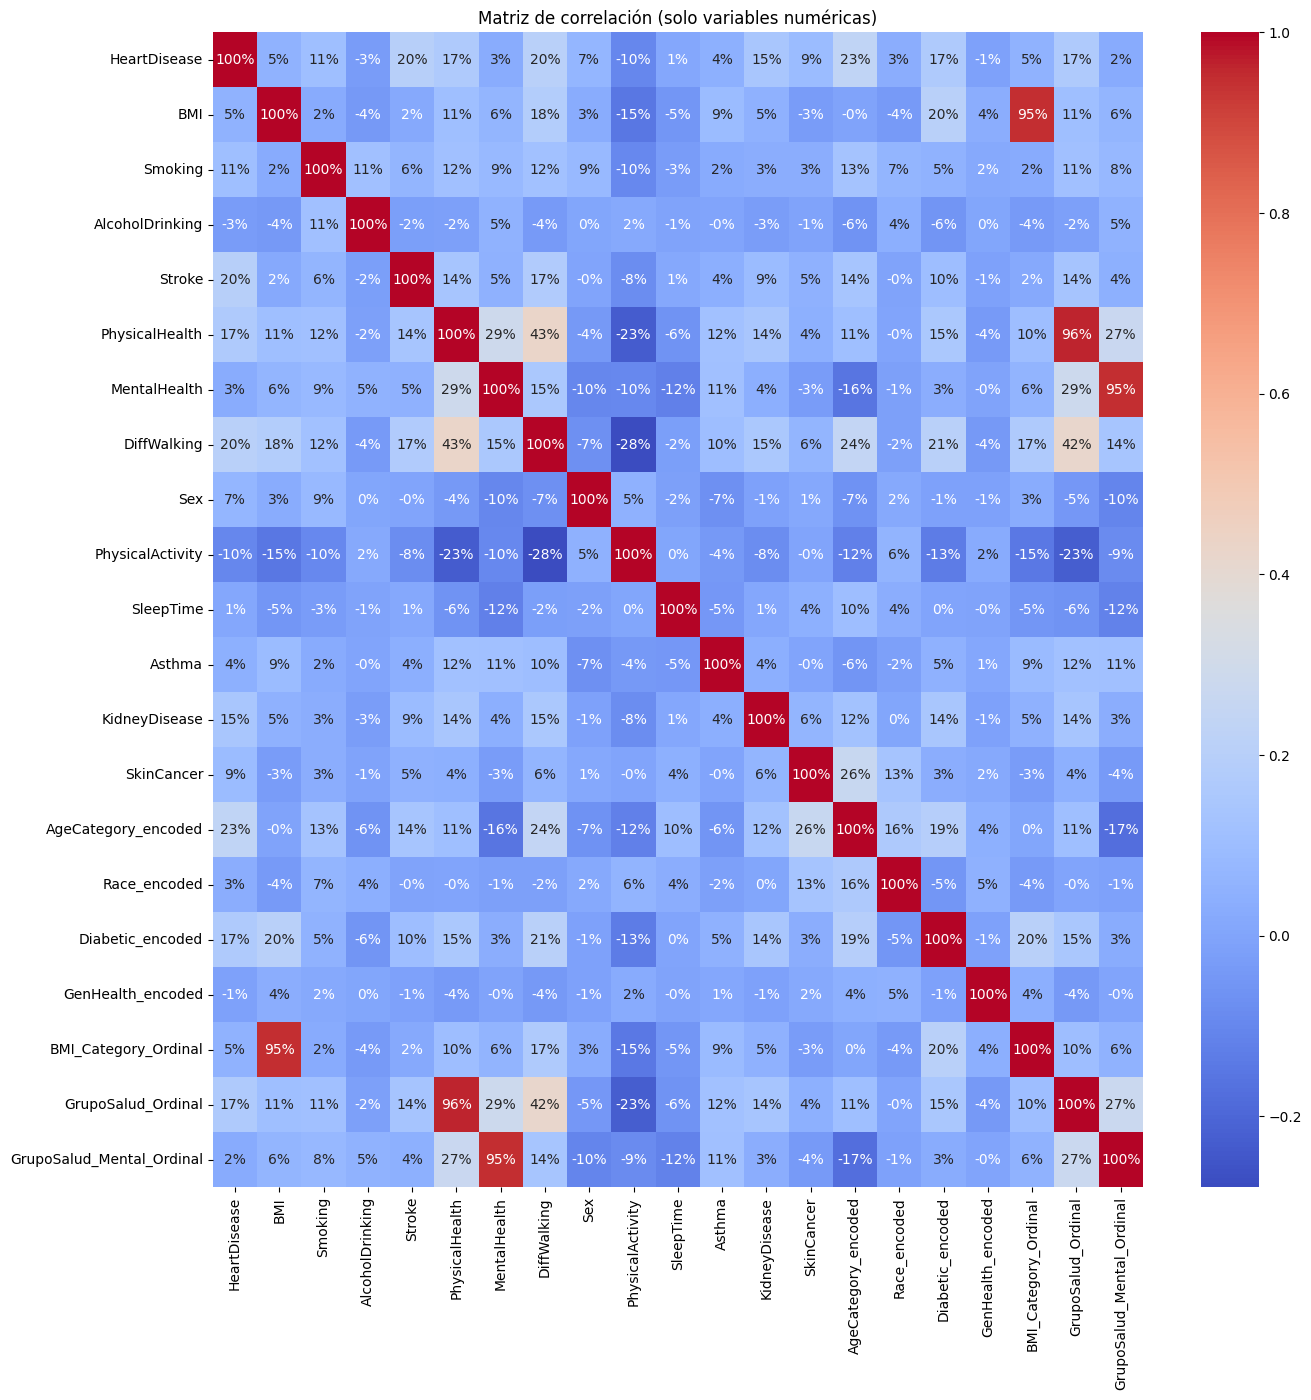

In [320]:
# Seleccionamos las columnas numéricas unicamente dejando fuera las de tipo object
numeric_columns = df.select_dtypes(include=['int32', 'float64', 'int64']).columns

# Calculamos la matriz de correlación para las columnas numéricas
correlation_matrix = df[numeric_columns].corr()

# Creamos mapa de calor de correlación
plt.figure(figsize=(15, 15))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".0%" )
plt.title('Matriz de correlación (solo variables numéricas)')
plt.show()


In [71]:
# Para observar mejor la correlación que se produce con respecto a la varible target de "HeartDisease"
# Se muestra en porcentage % y por orden ascendente únicamente de las variables numéricas 
corr_matrix = df[numeric_columns].corr()
corr_matrix['HeartDisease'].sort_values(ascending=False) *100

HeartDisease                 100.000000
AgeCategory_encoded           23.343224
DiffWalking                   20.125805
Stroke                        19.683530
PhysicalHealth                17.072097
Diabetic_encoded              16.855285
GrupoSalud_Ordinal            16.731876
KidneyDisease                 14.519710
Smoking                       10.776416
SkinCancer                     9.331688
Sex                            7.004048
BMI_Category_Ordinal           5.342468
BMI                            5.196582
Asthma                         4.144415
Race_encoded                   3.485362
MentalHealth                   2.859071
GrupoSalud_Mental_Ordinal      2.130066
SleepTime                      0.832665
GenHealth_encoded             -1.106186
AlcoholDrinking               -3.207974
PhysicalActivity             -10.002993
Name: HeartDisease, dtype: float64

In [72]:
# Eliminamos las columnas que no vamos a utilizar
columns_drop = ["PhysicalActivity","AlcoholDrinking", "GenHealth_encoded",
                   "Race_encoded","Asthma", "SkinCancer", "KidneyDisease", 
                   "AgeCategory", "SleepTime", "SleepGroup", "GenHealth","BMI_Category","GrupoSalud","GrupoSalud_Mental", "Race", "Diabetic", "PhysicalHealth", "BMI","MentalHealth"]

df = df.drop(columns=columns_drop)
